# Nuclei Detect  demo

This notebook can be used to predict cells and nuclei given one has the sufficient model and data

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random
#import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
pylab.rcParams['figure.figsize'] = 20, 12

# importing the prediction class
from predictor import NUCLEIdemo

The NUCLEIdemo class can load the config file and does the image prediction.

In [44]:
configuration_file = "../configs/nuclei_1gpu_nonorm_offline.yaml"

# update the config options with the config file
cfg.merge_from_file(configuration_file)

# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/models_new/20190313_offline_augment/model_final.pth'])

# define how many objects can be identified per image
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])

# show the configuration
#print(cfg)

Change the confidence threshold.

In [51]:
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size=512,
    confidence_threshold=0.1,
)

Let's define a few helper functions for loading images from a URL

In [52]:
# load image
def load(path):
    pil_image = Image.open(path).convert("RGB").resize((1024, 1024))
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

# show image alongside the result and save if necessary
def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()

### Define the image paths and show the results

Image /home/maxsen/git/ms2/ssss/AMEXP20181106_hyb1_DAPI_pos_478.png is handled.
Image shape:  (1024, 1024, 3)


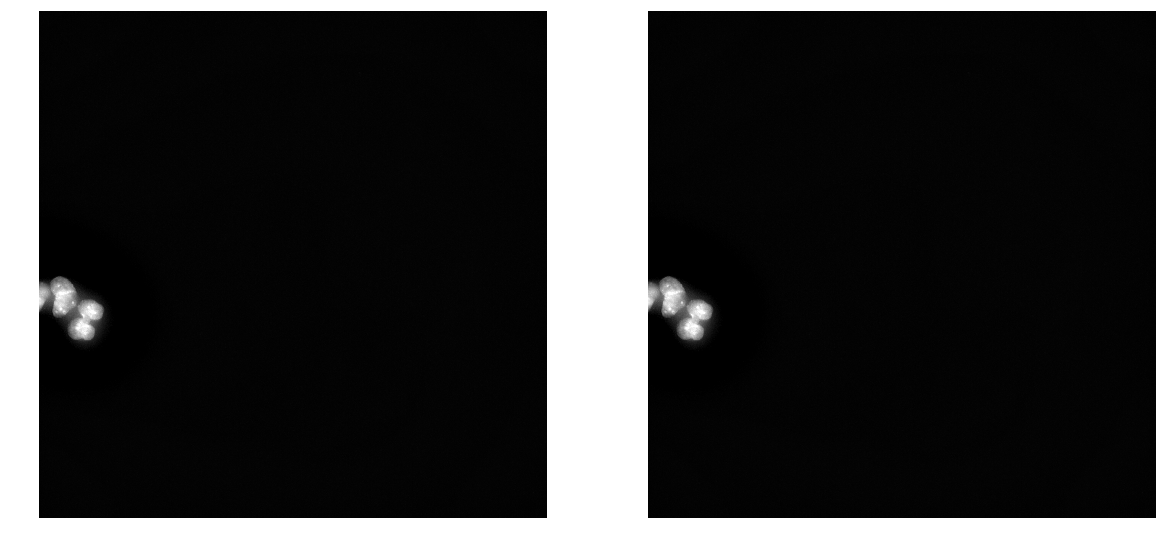

In [53]:
img_path = '/home/maxsen/git/ms2/ssss/'
#img_path = '/home/maxsen/DEEPL/data/nuclei_20190205_data/all/'

# random image is taken from the image path
random_img = random.choice(os.listdir(img_path))
print('Image {} is handled.'.format(img_path + random_img))
image = load(img_path + random_img)
print('Image shape: ',image.shape)

# results are computed
results, predictions = nuclei_detect.run_on_opencv_image(image)
imshow(image, results)